# 【補足】最急降下法  

`y = ax + b` フィッティング：a, b の値を算出  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches
import matplotlib.colors
import matplotlib.animation
from IPython.display import HTML
import japanize_matplotlib

In [2]:
max_epochs = 10000
#eta = 0.001
eta = 0.005
eps = 1e-4


---

$\hat{y}$ = ax + b をベクトルで表す  

$$
\begin{align}
\pmb{x} = \begin{pmatrix}
1 \\ x
\end{pmatrix},
\pmb{w} = \begin{pmatrix}
b \\ a
\end{pmatrix}
\end{align}
$$


\begin{align}
\hat{y} = \pmb{x}^\top\pmb{w}
\end{align}



\begin{align}
\hat{y} = b + xa = ax + b
\end{align}


xを転置(T)する理由  
- ベクトル「x」の列数とベクトル「w」の行数とが等しくないと、積の計算ができないルールがあるため  


In [3]:
D = np.array([[1, 3], [3, 6], [6, 5], [8, 7]])

上記の学習データは、以下のように表現できる  

\begin{align*}
\mathcal{D}_s = \left\{(\pmb{x}_i, y_i)\right\}_{i=1}^{4} = \left\{\left(\begin{pmatrix}1 & 1\end{pmatrix}^\top, 3\right), \left(\begin{pmatrix}1 & 3\end{pmatrix}^\top, 6\right), \left(\begin{pmatrix}1 & 6\end{pmatrix}^\top, 5\right), \left(\begin{pmatrix}1 & 8\end{pmatrix}^\top, 7\right)\right\}
\end{align*}


計画行列$\pmb{X} \in \mathbb{R}^{4 \times 2}$, 目的変数ベクトル$\pmb{y} \in \mathbb{R}^4$  
- 行列は「英大文字」で表す  


\begin{align}
\pmb{X} = \begin{pmatrix}
1 & 1 \\
1 & 3 \\
1 & 6 \\
1 & 8
\end{pmatrix},
\pmb{y} = \begin{pmatrix}
3 \\ 6 \\ 5 \\ 7
\end{pmatrix}
\end{align}


目的変数の予測ベクトル$\hat{\pmb{y}}$は行列$W$とベクトル$\pmb{w}$の積で求めることができる。

\begin{align}
\hat{\pmb{y}}
= \pmb{X} \pmb{w}
= \begin{pmatrix}
1 & 1 \\
1 & 3 \\
1 & 6 \\
1 & 8
\end{pmatrix}
\begin{pmatrix}
b \\ a
\end{pmatrix}
= \begin{pmatrix}
a + b \\
3a + b \\
6a + b \\
8a + b 
\end{pmatrix}
\end{align}



---

- $\pmb{X}$ を定義  


In [4]:
X = np.vstack([ np.ones_like(D[:,0]), D[:,0] ]).T
X

array([[1, 1],
       [1, 3],
       [1, 6],
       [1, 8]])

- yを定義  

In [5]:
Y = D[:,1]
Y

array([3, 6, 5, 7])

- w (b, a) の初期値：(0, 0)  

$$
\pmb{w} = \begin{pmatrix}
b \\ a
\end{pmatrix}
$$

In [6]:
W = np.zeros(X.shape[1])
W

array([0., 0.])


---

## 繰り返し(1回目)  

- $\hat{y}$ を定義  

\begin{align}
\hat{\pmb{y}}
= \pmb{X} \pmb{w}
\end{align}


In [7]:
Y_hat = X @ W
Y_hat

array([0., 0., 0., 0.])

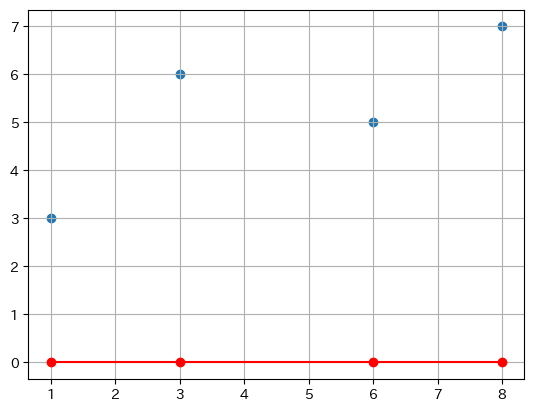

In [8]:
plt.scatter(X[:,1], Y)
plt.plot(X[:,1], Y_hat, 'r')
plt.plot(X[:,1], Y_hat, 'ro')
plt.grid()

- 目的関数：計算結果が最小値となる$\pmb{w}$を求める  
  → 最終的に0へ近づける  

\begin{align}
\hat{L}_{\mathcal{D}}(\pmb{w}) = \|\pmb{y} - \pmb{\hat{y}}\|^2 = \|\pmb{y} - \pmb{X} \pmb{w}\|^2
\end{align}


In [9]:
E = np.abs(Y - Y_hat)
np.sum(E**2) /  E.shape

array([29.75])

- 目的関数を$\pmb{w}$で偏微分  
  現在接している目的関数の傾きを算出  
  → 公式として覚えた方が良さそう  

\begin{align}
\nabla \hat{L}_{\mathcal{D}}(\pmb{w}) = \frac{\partial \hat{L}_{\mathcal{D}}(\pmb{w})}{\partial \pmb{w}} &= 2\pmb{X}^\top (\pmb{\hat{y}} - \pmb{y}) = 2\pmb{X}^\top (\pmb{X}\pmb{w} - \pmb{y})
\end{align}


In [10]:
grad = 2 * X.T @ (Y_hat - Y)
grad

array([ -42., -214.])

- $\pmb{w}$を最新化： `w1 = w0 - α∇f(w0)`  
  α = eta：進む距離(学習率)は固定値  
  距離 × 算出した傾き(∇f(w0) = grad) の逆方向へ進むのが効率的  
  - 谷底(=残差が0に近い最小値)への最短ルート → 現在位置から、最も下っている方向へ進む    
  - 距離が大きすぎると、最適値を飛び越えてしまう  
  - 距離が短いと、算出結果が出るまでの実行回数が増える  


In [11]:
W -= eta * grad
W

array([0.21, 1.07])


---

## 繰り返し(2回目)  


In [12]:
Y_hat = X @ W
Y_hat

array([1.28, 3.42, 6.63, 8.77])

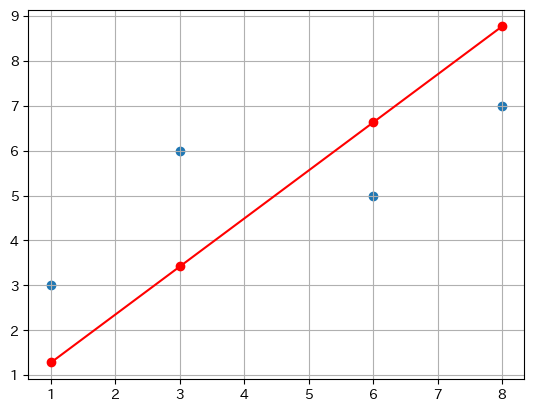

In [13]:
plt.scatter(X[:,1], Y)
plt.plot(X[:,1], Y_hat, 'r')
plt.plot(X[:,1], Y_hat, 'ro')
plt.grid()

- 平均二乗残差  

In [14]:
E = np.abs(Y - Y_hat)
np.sum(E**2) /  E.shape

array([3.85115])

- 現在接している目的関数の傾き  

In [15]:
grad = 2 * X.T @ (Y_hat - Y)
grad

array([-1.8 , 28.96])

- $\pmb{w}$を最新化  


In [16]:
W -= eta * grad
W

array([0.219 , 0.9252])


---

## 繰り返し(条件を満たすまで)  

平均二乗残差が目標値： `eps = 1e-4` に達するまで繰り返す  

In [17]:
max_epochs = 10000
eta = 0.001
eps = 1e-4
W = np.zeros(X.shape[1])

for t in range(max_epochs):
    Y_hat = X @ W
    grad = 2 * X.T @ (Y_hat - Y)
    if np.sum(np.abs(grad)) < eps:
        break
    W -= eta * grad

W

array([3.31030308, 0.43104138])


---

## 行列演算で最小値を算出した場合  

目的関数を最小化する、ベクトル$\pmb{w}$の求め方  

$$
\begin{align}
\pmb{w} &= (\pmb{X}^\top \pmb{X})^{-1}\pmb{X}^\top \pmb{y}
\end{align}
$$


- `numpy.linalg.inv()`：逆行列 (行列$^{-1}$)  

In [18]:
w = np.linalg.inv(X.T @ X) @ X.T @ Y
w

array([3.31034483, 0.43103448])


---
